In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Titanic-Dataset.csv")
df = pd.DataFrame(data)

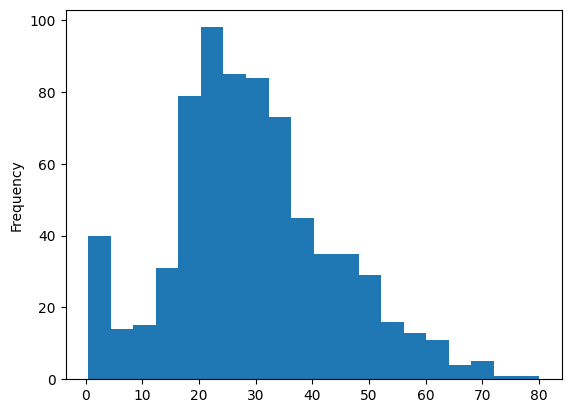

In [3]:
#univariate 
# numerical cols
# for age
df["Age"].describe()

age = df["Age"].plot(kind="hist",bins=20)
plt.show()

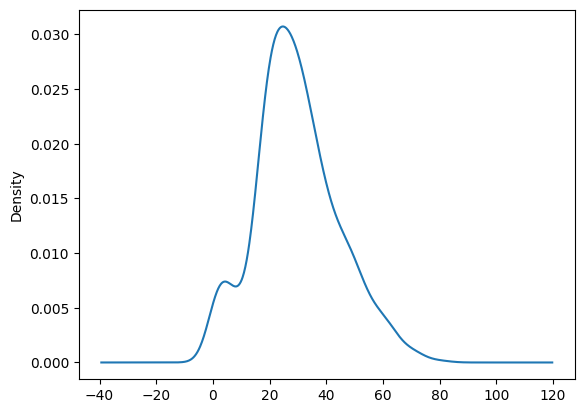

In [4]:
age_dist = df["Age"].plot(kind="kde")
plt.show()


In [5]:
df["Age"].skew()

np.float64(0.38910778230082704)

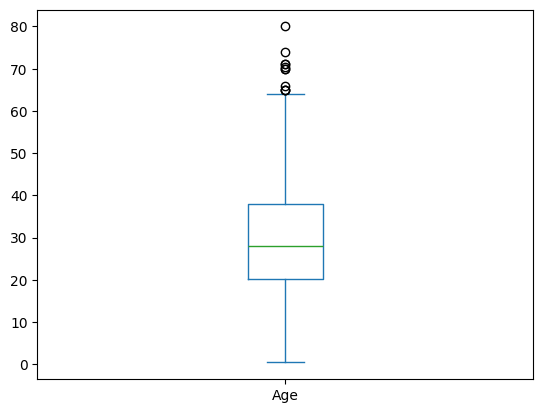

177


In [6]:
# identify outliers
out = df["Age"].plot(kind="box")
plt.show()

print(df['Age'].isnull().sum())
per = df['Age'].isnull().sum()/len(df["Age"])


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


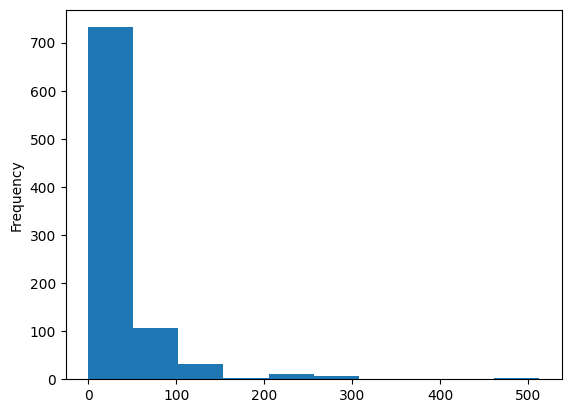

4.787316519674893
     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C  
0


In [7]:
# Fare
print(df["Fare"].describe())
df["Fare"].plot(kind="hist")
plt.show()
print(df["Fare"].skew())
print(df[df["Fare"]>300])
print(df['Fare'].isnull().sum())


Survived
0    549
1    342
Name: count, dtype: int64


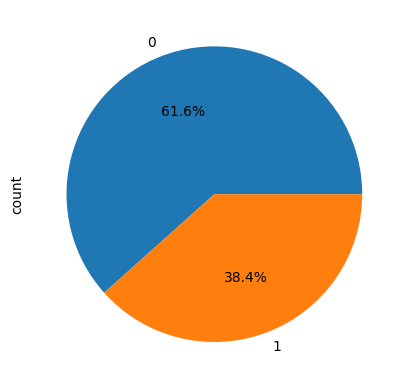

In [8]:
# categorical columns
print(df['Survived'].value_counts())
survive = df['Survived'].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.show()

0


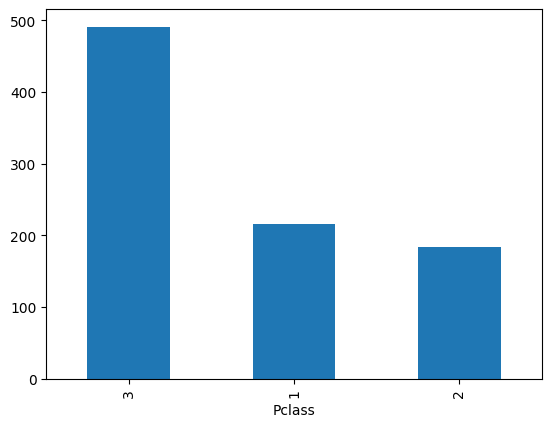

In [9]:
print(df["Survived"].isnull().sum())
df['Pclass'].value_counts().plot(kind="bar")
plt.show()


Sex
male      577
female    314
Name: count, dtype: int64


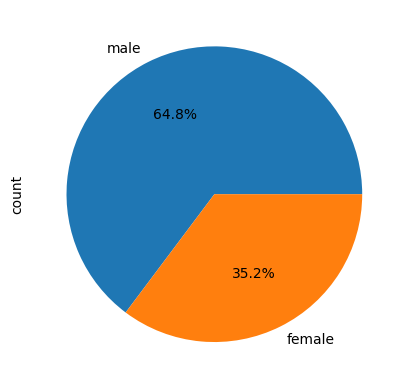

In [10]:
print(df['Sex'].value_counts())
df['Sex'].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.show()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


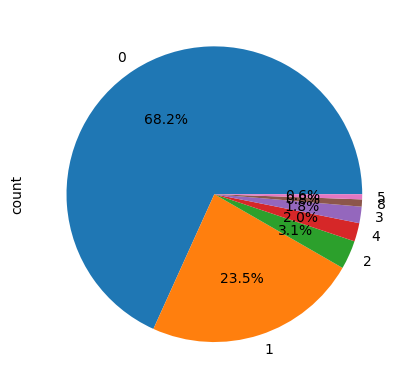

In [11]:
print(df['SibSp'].value_counts())
df['SibSp'].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.show()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


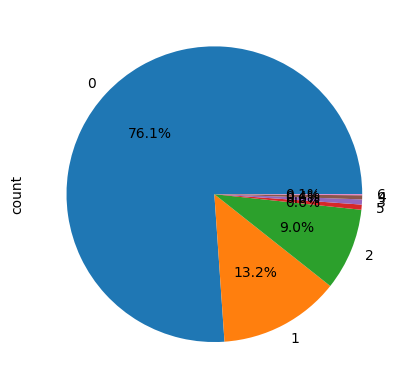

In [12]:
print(df['Parch'].value_counts())
df['Parch'].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.show()

In [13]:
#bivariate
#choose main column and bivariate it with all columns

#survived and pclass
print(pd.crosstab(df['Survived'],df["Pclass"],normalize="columns")*100)

#survived and gender
print(pd.crosstab(df['Survived'],df["Sex"],normalize="columns")*100)

#survived and embarked
print(pd.crosstab(df['Survived'],df["Embarked"],normalize="columns")*100)

#gender and embarked
print(pd.crosstab(df['Sex'],df["Embarked"],normalize="columns")*100)

#pclass and embarked
print(pd.crosstab(df['Pclass'],df["Embarked"],normalize="columns")*100)


Pclass            1          2          3
Survived                                 
0         37.037037  52.717391  75.763747
1         62.962963  47.282609  24.236253
Sex          female       male
Survived                      
0         25.796178  81.109185
1         74.203822  18.890815
Embarked          C          Q          S
Survived                                 
0         44.642857  61.038961  66.304348
1         55.357143  38.961039  33.695652
Embarked          C          Q          S
Sex                                      
female    43.452381  46.753247  31.521739
male      56.547619  53.246753  68.478261
Embarked          C          Q          S
Pclass                                   
1         50.595238   2.597403  19.720497
2         10.119048   3.896104  25.465839
3         39.285714  93.506494  54.813665


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


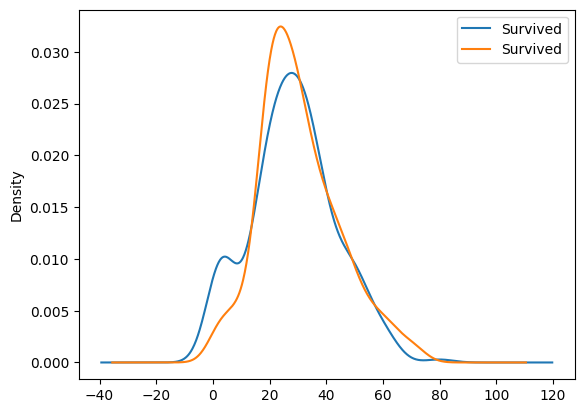

In [14]:
#survived and age
print(df[df["Survived"]==1]['Age'].plot(kind="kde",label="Survived"))
print(df[df["Survived"]==0]['Age'].plot(kind="kde",label="Survived"))
plt.legend()
plt.show()

In [15]:
#feature engineering
print(df[df["SibSp"]==8])


     PassengerId  Survived  Pclass                               Name     Sex  \
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

     Age  SibSp  Parch    Ticket   Fare Cabin Embarked  
159  NaN      8      2  CA. 2343  69.55   NaN        S  
180  NaN      8      2  CA. 2343  69.55   NaN        S  
201  NaN      8      2  CA. 2343  69.55   NaN        S  
324  NaN      8      2  CA. 2343  69.55   NaN        S  
792  NaN      8      2  CA. 2343  69.55   NaN        S  
846  NaN 

In [16]:
df[df["Ticket"]=="CA. 2343"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [17]:
df["Family_size"] = df["SibSp"] + df["Parch"] + 1
df["ind_fare"] = df["Fare"]/df["Family_size"]
print(df["ind_fare"])

0       3.62500
1      35.64165
2       7.92500
3      26.55000
4       8.05000
         ...   
886    13.00000
887    30.00000
888     5.86250
889    30.00000
890     7.75000
Name: ind_fare, Length: 891, dtype: float64


In [18]:
def family_type(size):
    if size==1:
        return "Single"
    elif size<=4:
        return "Small"
    else:
        return "Large"
    
df["Family_type"] = df["Family_size"].apply(family_type)
print(df["Family_type"])


0       Small
1       Small
2      Single
3       Small
4      Single
        ...  
886    Single
887    Single
888     Small
889    Single
890    Single
Name: Family_type, Length: 891, dtype: object


In [19]:
pd.crosstab(df["Family_type"],df["Survived"],normalize="index")*100

Survived,0,1
Family_type,,
Large,83.870968,16.129032
Single,69.646182,30.353818
Small,42.123288,57.876712


In [20]:
df["surname"] = df["Name"].str.split(",").str.get(0)
print(df["surname"]) 

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: surname, Length: 891, dtype: object


In [26]:
df["title"] = df["Name"].str.split(",").str.get(1).str.strip().str.split(".").str.get(0)
df["title"] = df["title"].str.strip().str.lower()
df["title"] = df["title"].replace({
    "mlle":"miss",
    "ms.":"miss.",
    "mme":"mrs",
    "lady":"royal",
    "countess":"royal",
    "capt":"officer",
    "col":"officer",
    "don":"royal",
    "jonkheer":"royal",
    "dona":"royal"
})
print(df["title"].unique())
print(df["title"].value_counts())

['mr' 'mrs' 'miss' 'master' 'royal' 'rev' 'dr' 'ms' 'major' 'sir'
 'officer' 'the countess']
title
mr              517
miss            184
mrs             126
master           40
dr                7
rev               6
royal             3
officer           3
major             2
ms                1
sir               1
the countess      1
Name: count, dtype: int64


In [22]:
print(df["Cabin"].value_counts().head(15))
print(df["Cabin"].fillna("M",inplace=True))
print(df["Cabin"].isnull().sum())


Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
E101           3
C22 C26        3
F33            3
C83            2
C123           2
B28            2
D26            2
B58 B60        2
E33            2
D33            2
Name: count, dtype: int64
None
0


C:\Users\Asus\AppData\Local\Temp\ipykernel_2132\2735280188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(df["Cabin"].fillna("M",inplace=True))


In [23]:
df["deck"] = df["Cabin"].str[0]
print(df["deck"])

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: deck, Length: 891, dtype: object


Pclass   1    2    3
deck                
A       15    0    0
B       47    0    0
C       59    0    0
D       29    4    0
E       25    4    3
F        0    8    5
G        0    0    4
M       40  168  479
T        1    0    0


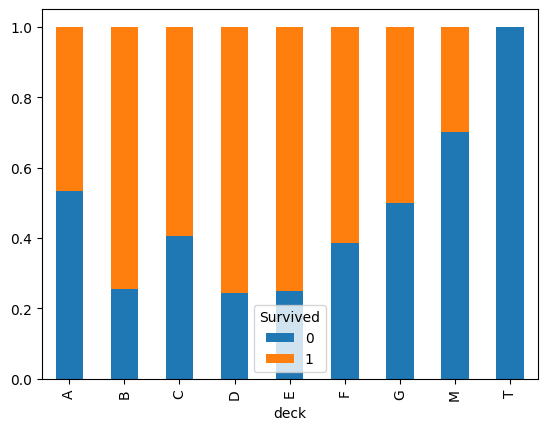

In [24]:
print(pd.crosstab(df["deck"],df["Pclass"]))
pd.crosstab(df["deck"],df["Survived"],normalize="index").plot(kind="bar",stacked=True)
plt.show()

In [25]:
# pandas profiling
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file = "output.html")



C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 37.92it/s]
